# Problem 1

Implement the golden section search algorithm. Using your favourite programming language create a function (or whatever) that takes following paramters:

- a black-box function f (assuming that it’s strictly decreasing and then strictly increasing) taking 1-dim argument, use 
 as an example;   
- two floating point values: lb for lower bound of desired point of minimum and ub — for upper bound;    
- the allowed absolute error for returned value and returns the function argument value at which the the function takes the minimum value in accordance with precision requiered.    

In [167]:
def f(x):
    return x**2

In [175]:
def golden_section_search(f, lb, ub, ae):
    ρ = (1 + 5**0.5) / 2 - 1
    d = ρ * ub + (1 - ρ) * lb
    yd = f(d)
    e = 1
    while e >= ae:
        c = ρ * lb + (1 - ρ) * ub
        yc = f(c)
        if yc < yd:
            ub, d, yd = d, c, yc
            e=((1-c)*(abs((ub-lb)/yc)))*100
        else:
            lb, ub = b, c
            e=((1-c)*(abs((ub-lb)/yd)))*100
    print ((lb, ub) if lb < ub else (ub, lb))
    return (lb+ub)/2

In [178]:
print(golden_section_search(f, 0.5, 1.0, 1))

(0.5, 0.5040653093778917)
0.5020326546889459


# Problem 2

Consider Himmelblau’s function:
- Find all local minima analytically by constructing sufficient condition on optimiality.


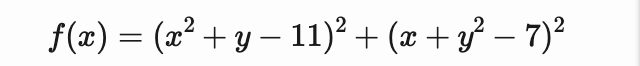

In [14]:
from sympy import symbols, diff

In [20]:
def f(x, y):
    return (x**2 + y - 11)**2 + (x+y**2 - 7)**2

**Firstly let's find the derivatives of Himmelblau’s function**

In [15]:
x, y = symbols('x y')
f = (x**2 + y - 11)**2 + (x+y**2 - 7)**2
f_partial_x = diff(f, x)
f_partial_y = diff(f, y)
print(f_partial_x)
print(f_partial_y)

4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22


In [3]:
import sympy as sym
sym.init_printing()
x,y= sym.symbols('x,y')

**Then solve the system of equations, when the derivaties are equal to 0**

In [55]:
from sympy import Symbol, nsolve, solve, nonlinsolve, rsolve
from sympy.solvers.solvers import unrad
from sympy.abc import x
from sympy import sqrt, Rational, root
import sympy
from mpmath import *
mp.dps = 15
x = Symbol('x')
y = Symbol('y')
f = sym.Eq(4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 0.0)
g = sym.Eq(2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22, 0.0)
sol = solve([f,g],(x,y))

In [62]:
print(sol)
    

[(3, 2), ((-495057628370223861931520872762462249121894539790138970*sqrt(6303) - 4870479408313127062830355639493104228716972612257815917*2**(1/3)*I*(317 + 3*sqrt(6303)*I)**(2/3) - 158281314441521881059095371226899838034197238333481145658*I - 406145046242831468108010255682197970027023667721404976*2**(2/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(1/3) + 1828746360281109769284180128966426435544957620821148880*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3) + 33221251664738294426485886763715577381947062679278851*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(2/3))/(6*(82509604728370643655253478793743708186982423298356495*sqrt(6303) + 26380219073586980176515895204483306339032873055580190943*I)), -2/3 + 34/(9*(317/54 + sqrt(6303)*I/18)**(1/3)) + (317/54 + sqrt(6303)*I/18)**(1/3)), ((-990115256740447723863041745524924498243789079580277940*sqrt(6303) - 316562628883043762118190742453799676068394476666962291316*I - 33221251664738294426485886763715577381947062679278851*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)

Answer: so we have four pairs of roots with locan minima

In [9]:
print(*sol, sep = '\n\n')

(3, 2)

((-495057628370223861931520872762462249121894539790138970*sqrt(6303) - 4870479408313127062830355639493104228716972612257815917*2**(1/3)*I*(317 + 3*sqrt(6303)*I)**(2/3) - 158281314441521881059095371226899838034197238333481145658*I - 406145046242831468108010255682197970027023667721404976*2**(2/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(1/3) + 1828746360281109769284180128966426435544957620821148880*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3) + 33221251664738294426485886763715577381947062679278851*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(2/3))/(6*(82509604728370643655253478793743708186982423298356495*sqrt(6303) + 26380219073586980176515895204483306339032873055580190943*I)), -2/3 + 34/(9*(317/54 + sqrt(6303)*I/18)**(1/3)) + (317/54 + sqrt(6303)*I/18)**(1/3))

((-990115256740447723863041745524924498243789079580277940*sqrt(6303) - 316562628883043762118190742453799676068394476666962291316*I - 33221251664738294426485886763715577381947062679278851*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)*

**Three pairs of them are complex numbers**

# Problem 3

$f(x, y) = (x^2 + y - 11)^2 + (x+y^2 - 7)^2$

$g(x,y) = y-x^2$   


**Begin by writing the Lagrangian function:**    
$\mathscr{L(x, y, \lambda)} = (x^2 + y - 11)^2 + (x+y^2 - 7)^2 - \lambda(y-x^2)$

**Now let's find partial derivatives**

In [23]:
from sympy import symbols, diff
x, y, l = symbols('x y l', real=True)

f = (x**2 + y - 11)**2 + (x+y**2 - 7)**2 - l*(y-x**2)
f_partial_x = diff(f, x)
f_partial_y = diff(f, y)
f_partial_l = diff(f, l)
print(f_partial_x)
print(f_partial_y)
print(f_partial_l)

2*l*x + 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
-l + 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
x**2 - y


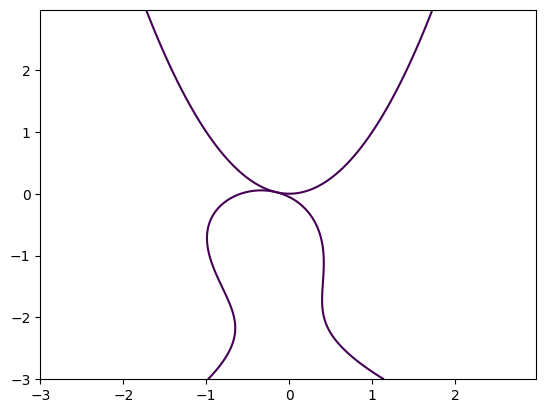

In [166]:
import matplotlib.pyplot
from numpy import arange, meshgrid, sqrt
delta = 0.025
x, y = meshgrid(
    arange(-3, 3, delta),
    arange(-3, 3, delta)
)
matplotlib.pyplot.contour(
    x, y,
    (x**2 + y - 11)**2 + (x+y**2 - 7)**2,
    [171.132464275502]
)
matplotlib.pyplot.contour(
    x, y,
    y-x**2,
    [0]
)
matplotlib.pyplot.show()

**Partial derivatives to 0, and calculate the equation system with respect to x, y, and l(Lagrandge multiplyer)**

In [92]:
from sympy import Symbol, nsolve, solve, nonlinsolve
import sympy
from mpmath import *
mp.dps = 15
x = Symbol('x')
y = Symbol('y')
l = Symbol('l')
f1 = 2*l*x + 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
f2 = -l + 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
f3 = x**2 - y
print(nsolve((f1, f2, f3), (x, y, l), (0, 0, 0)))

Matrix([[-0.160780134712980], [0.0258502517183239], [-22.6369617728294]])


**So find global minimum**

In [93]:
x = -0.160780134712980
y = 0.0258502517183239
global_minimum = (x**2 + y - 11)**2 + (x+y**2 - 7)**2

In [94]:
global_minimum

**Answer:171.132464275502**